In [1]:
#!pip install keras
#!pip install tensorflow

In [2]:
import pandas as pd
import os
import glob
import tensorflow as tf
import matplotlib.pyplot as plt


import plotly.graph_objs as go
from datetime import datetime
import plotly.express as px
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder,MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

In [3]:
#Se carga información de delitos en el periodo 2015-2023
all_data = pd.DataFrame()
for f in glob.glob("*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

### Revisión de información de delitos

In [4]:
all_data.sample()

,Fecha,Año,Nro del Mes,Mes,Localidad,UPZ,Delito,Sexo,Nombre Dia,Rango del Dia,Arma Empleada,Numero Hechos
43359,2015-06-02,2015,6,JUN,01 - USAQUÉN,LOS CEDROS,HURTO DE CELULARES (CASOS),FEMENINO,MARTES,TARDE,ARMA BLANCA / CORTOPUNZANTE,1.0


In [5]:
all_data.columns

Index(['Fecha', 'Año', 'Nro del Mes', 'Mes', 'Localidad', 'UPZ', 'Delito',
       'Sexo', 'Nombre Dia', 'Rango del Dia', 'Arma Empleada',
       'Numero Hechos'],
      dtype='object')

In [6]:
#Se define la columna fecha en formato datetype
all_data["Fecha"]=all_data["Fecha"].astype('datetime64[ns]')

In [7]:
all_data.dtypes

Fecha            datetime64[ns]
Año                       int64
Nro del Mes               int64
Mes                      object
Localidad                object
UPZ                      object
Delito                   object
Sexo                     object
Nombre Dia               object
Rango del Dia            object
Arma Empleada            object
Numero Hechos           float64
dtype: object

In [8]:
#Se identifican rows vacias
all_data.isna().sum()

Fecha            0
Año              0
Nro del Mes      0
Mes              0
Localidad        8
UPZ              8
Delito           8
Sexo             8
Nombre Dia       8
Rango del Dia    8
Arma Empleada    8
Numero Hechos    8
dtype: int64

In [9]:
all_data[all_data.Localidad.isna()]

,Fecha,Año,Nro del Mes,Mes,Localidad,UPZ,Delito,Sexo,Nombre Dia,Rango del Dia,Arma Empleada,Numero Hechos
82767,2015-11-09,2015,11,NOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166665,2016-08-18,2016,8,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231246,2017-04-19,2017,4,ABR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333331,2018-03-04,2018,3,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382199,2019-03-02,2019,3,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480901,2020-03-11,2020,3,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556624,2021-03-16,2021,3,MAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625368,2022-02-21,2022,2,FEB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
all_data.describe()

,Año,Nro del Mes,Numero Hechos
count,708611.000000,708611.000000,708603.000000
mean,2018.766382,4.000032,1.452781
std,2.463126,3.288540,3.315952
min,2015.000000,1.000000,1.000000
25%,2017.000000,1.000000,1.000000
50%,2019.000000,2.000000,1.000000
75%,2021.000000,6.000000,2.000000
max,2023.000000,12.000000,1466.000000


In [11]:
#Se eliminan los registros con valores nulos

df2=all_data.dropna(subset=['Localidad'])

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708603 entries, 0 to 708610
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Fecha          708603 non-null  datetime64[ns]
 1   Año            708603 non-null  int64         
 2   Nro del Mes    708603 non-null  int64         
 3   Mes            708603 non-null  object        
 4   Localidad      708603 non-null  object        
 5   UPZ            708603 non-null  object        
 6   Delito         708603 non-null  object        
 7   Sexo           708603 non-null  object        
 8   Nombre Dia     708603 non-null  object        
 9   Rango del Dia  708603 non-null  object        
 10  Arma Empleada  708603 non-null  object        
 11  Numero Hechos  708603 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 70.3+ MB


In [13]:
Delito='VIOLENCIA INTRAFAMILIAR'
Ano=2019
UPZ='CHICO LAGO'

In [14]:
df2=df2[(df2["Delito"]==Delito)&(df2["Año"]>=2018)&(df2["Año"]<=2022)&(df2["Localidad"]=="02 - CHAPINERO")]

In [15]:
df2.sample(5)

,Fecha,Año,Nro del Mes,Mes,Localidad,UPZ,Delito,Sexo,Nombre Dia,Rango del Dia,Arma Empleada,Numero Hechos
642537,2022-07-28,2022,7,JUL,02 - CHAPINERO,CHICO LAGO,VIOLENCIA INTRAFAMILIAR,FEMENINO,JUEVES,MADRUGADA,SIN EMPLEO DE ARMAS,2.0
627483,2022-03-11,2022,3,MAR,02 - CHAPINERO,CHICO LAGO,VIOLENCIA INTRAFAMILIAR,FEMENINO,VIERNES,MAÑANA,SIN EMPLEO DE ARMAS,2.0
603789,2022-01-28,2022,1,ENE,02 - CHAPINERO,CHICO LAGO,VIOLENCIA INTRAFAMILIAR,FEMENINO,VIERNES,MADRUGADA,SIN EMPLEO DE ARMAS,2.0
444136,2020-01-31,2020,1,ENE,02 - CHAPINERO,CHAPINERO,VIOLENCIA INTRAFAMILIAR,FEMENINO,VIERNES,MADRUGADA,NO REPORTADO,1.0
345429,2019-01-19,2019,1,ENE,02 - CHAPINERO,PARDO RUBIO,VIOLENCIA INTRAFAMILIAR,FEMENINO,SÁBADO,NOCHE,NO REPORTADO,1.0


In [16]:
df2=df2.groupby(by=["Fecha"]).sum()

In [17]:
#Se eliminan variables Año, Nro del Mes y Mes

#df2=df2.drop(["Año", "Nro del Mes","Mes","Fecha"],axis=1)
df2=df2.drop(["Año", "Nro del Mes"],axis=1)

In [18]:
#Columnas con variables categóricas
df2.select_dtypes('object').columns

Index([], dtype='object')

In [19]:
#Se cambian a variables numéricas a categóricas con Label Encoder

for i in df2.select_dtypes('object').columns:
  le = LabelEncoder().fit(df2[i])
  df2[i] = le.transform(df2[i])

In [20]:
df2.describe()

,Numero Hechos
count,464.000000
mean,2.497845
std,1.511652
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,11.000000


In [21]:
df2.dtypes

Numero Hechos    float64
dtype: object

In [22]:
df2.shape

(464, 1)

In [23]:
df2.columns

Index(['Numero Hechos'], dtype='object')

In [24]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [25]:
intervalo_validar=int(round(df2.shape[0]*0.1,0))

In [26]:
hist_window = 30
horizon = 30

In [27]:
#validate =df2[['Localidad', 'UPZ', 'Delito', 'Sexo', 'Nombre Dia','Rango del Dia', 'Arma Empleada', 'Numero Hechos']].tail(intervalo_validar)
validate =df2[['Numero Hechos']].tail(horizon)

In [28]:
df2.drop(df2.tail(intervalo_validar).index,inplace=True)

In [29]:
df3_fecha=df2.groupby(['Fecha'])['Numero Hechos'].sum()

<Axes: xlabel='Fecha', ylabel='Numero Hechos'>

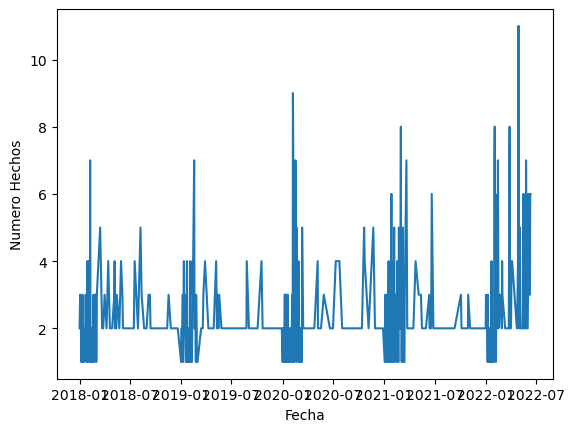

In [30]:
sns.lineplot(data=df3_fecha)

In [31]:
df2=df2.reset_index()

In [32]:
X_scaler = MinMaxScaler()
Y_scaler = MinMaxScaler()
#X_data = X_scaler.fit_transform(df2[[ 'Localidad', 'UPZ', 'Delito', 'Sexo', 'Nombre Dia','Rango del Dia', 'Arma Empleada', 'Numero Hechos']])
X_data = X_scaler.fit_transform(df2[['Fecha']])
Y_data = Y_scaler.fit_transform(df2[['Numero Hechos']])

In [33]:
import math
TRAIN_SPLIT=math.floor(X_data.shape[0]*0.7)

In [34]:
TRAIN_SPLIT

292

In [35]:
x_train, y_train = custom_ts_multi_data_prep(X_data, Y_data, 0, TRAIN_SPLIT, hist_window, horizon)
x_vali, y_vali = custom_ts_multi_data_prep(X_data, Y_data, TRAIN_SPLIT, None, hist_window, horizon)

In [36]:
print ('Multiple window of past history\n')
print(x_train[0])
print ('\n Target horizon\n')
print (y_train[0])

Multiple window of past history

[[0.        ]
 [0.00123381]
 [0.00308452]
 [0.00370142]
 [0.00493523]
 [0.00555213]
 [0.00616903]
 [0.00678593]
 [0.00740284]
 [0.00801974]
 [0.00863664]
 [0.00925355]
 [0.00987045]
 [0.01172116]
 [0.01295497]
 [0.01357187]
 [0.01418877]
 [0.01480568]
 [0.01542258]
 [0.01603948]
 [0.01665638]
 [0.01727329]
 [0.01789019]
 [0.01850709]
 [0.019124  ]
 [0.0203578 ]
 [0.02097471]
 [0.02159161]
 [0.02220851]
 [0.02282542]]

 Target horizon

[[0.1]
 [0. ]
 [0. ]
 [0.1]
 [0. ]
 [0.1]
 [0. ]
 [0.1]
 [0.2]
 [0.1]
 [0. ]
 [0. ]
 [0.1]
 [0.2]
 [0.2]
 [0.1]
 [0.2]
 [0. ]
 [0.2]
 [0.4]
 [0.1]
 [0.1]
 [0.2]
 [0.1]
 [0.3]
 [0.1]
 [0.1]
 [0.2]
 [0.3]
 [0.1]]


In [37]:
batch_size = 256
buffer_size = 150

train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.cache().shuffle(buffer_size).batch(batch_size).repeat()

val_data = tf.data.Dataset.from_tensor_slices((x_vali, y_vali))
val_data = val_data.batch(batch_size).repeat()

In [38]:
lstm_model=[]

In [39]:
x_train.shape

(262, 30, 1)

In [40]:
lstm_model = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True), 
                               input_shape=x_train.shape[-2:]),
    tf.keras.layers.Dense(40, activation='tanh'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150)),
    tf.keras.layers.Dense(20, activation='tanh'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=horizon)
])
lstm_model.compile(optimizer='adam', loss='mse')#,metrics=['accuracy'])

In [41]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 30, 300)          182400    
 l)                                                              
                                                                 
 dense (Dense)               (None, 30, 40)            12040     
                                                                 
 bidirectional_1 (Bidirectio  (None, 300)              229200    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 20)                6020      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 30)                6

In [42]:
model_path = 'Bidirectional_LSTM_Multivariate.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]

In [43]:
history = lstm_model.fit(train_data,epochs=150,steps_per_epoch=100,validation_data=val_data,validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/150
100/100 [==============================] - 47s 340ms/step - loss: 0.0206 - val_loss: 0.0428
Epoch 2/150
100/100 [==============================] - 32s 314ms/step - loss: 0.0171 - val_loss: 0.0415
Epoch 3/150
100/100 [==============================] - 31s 311ms/step - loss: 0.0167 - val_loss: 0.0418
Epoch 4/150
100/100 [==============================] - 33s 324ms/step - loss: 0.0166 - val_loss: 0.0418
Epoch 5/150
100/100 [==============================] - 32s 316ms/step - loss: 0.0165 - val_loss: 0.0421
Epoch 6/150
100/100 [==============================] - 31s 305ms/step - loss: 0.0164 - val_loss: 0.0406
Epoch 7/150
100/100 [==============================] - 32s 319ms/step - loss: 0.0163 - val_loss: 0.0389
Epoch 8/150
100/100 [==============================] - 33s 329ms/step - loss: 0.0162 - val_loss: 0.0393
Epoch 9/150
100/100 [==============================] - 41s 411ms/step - loss: 0.0162 - val_loss: 0.0393
Epoch 10/150
100/100 [==============================] - 47s 465m

In [44]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


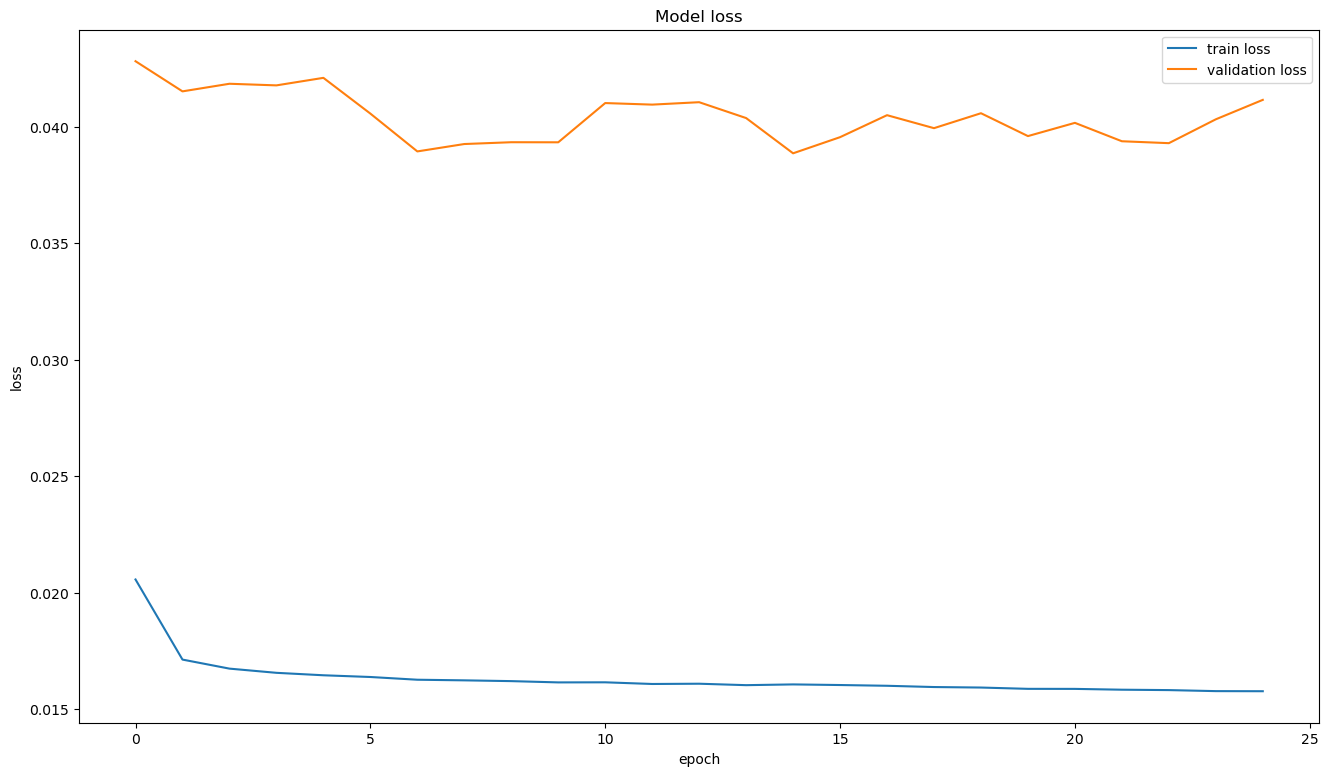

In [45]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [46]:
#data_val = X_scaler.fit_transform(df2[[ 'Localidad', 'UPZ', 'Delito', 'Sexo', 'Nombre Dia','Rango del Dia', 'Arma Empleada', 'Numero Hechos']].tail(intervalo_validar))
data_val = X_scaler.fit_transform(df2[['Numero Hechos']].tail(horizon))
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [47]:
data_val.shape,x_train.shape,val_rescaled.shape

((30, 1), (262, 30, 1), (1, 30, 1))

In [48]:
#pred = lstm_model.predict(data_val)

pred = lstm_model.predict(val_rescaled)
#pred

1/1 [==============================] - 3s 3s/step


In [49]:
pred_Inverse = Y_scaler.inverse_transform(pred)

In [50]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [51]:
from sklearn import metrics # for the evalution
timeseries_evaluation_metrics_func(validate['Numero Hechos'],pred_Inverse[0])

Evaluation metric results:-
MSE is : 5.098812796555877
MAE is : 1.6595181514819464
RMSE is : 2.258055091567935
MAPE is : 54.59025139609973
R2 is : -1.3118042906298695



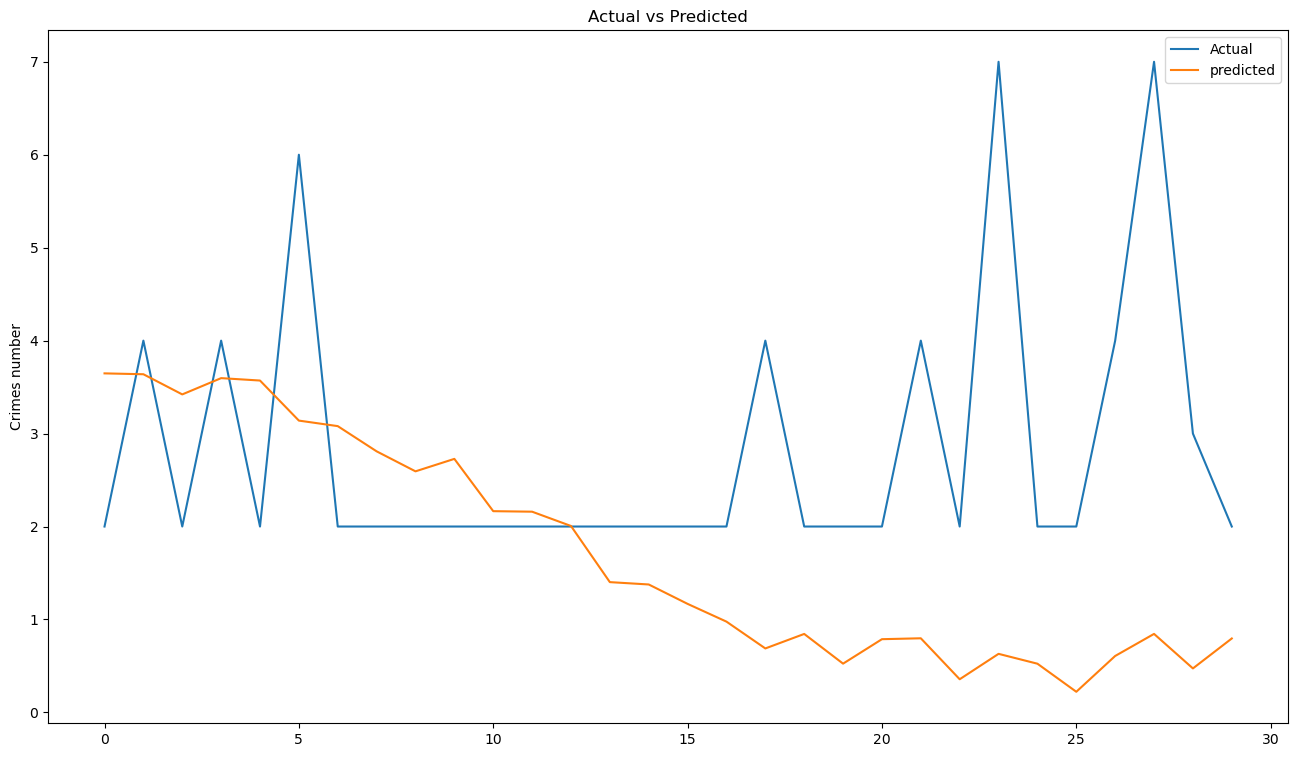

In [52]:
plt.figure(figsize=(16,9))
plt.plot( list(validate['Numero Hechos']))
plt.plot( list(pred_Inverse[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Crimes number")
plt.legend(('Actual','predicted'))
plt.show()

https://analyticsindiamag.com/how-to-do-multivariate-time-series-forecasting-using-lstm/

## CNN Univariate Horizon Style in Action

In [53]:
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dropout

In [54]:
tf.random.set_seed(123)
np.random.seed(123)

In [55]:
df2=all_data.dropna(subset=['Localidad'])

In [56]:
# Se escogen las características que se desean para modelar

Delito='VIOLENCIA INTRAFAMILIAR'
Ano=2019
UPZ='CHICO LAGO'

In [57]:
periodo_prueba=df2[(df2["Delito"]==Delito)&(df2["Año"]>=2018)&(df2["Año"]<=2022)]

In [58]:
periodo_prueba.head()

,Fecha,Año,Nro del Mes,Mes,Localidad,UPZ,Delito,Sexo,Nombre Dia,Rango del Dia,Arma Empleada,Numero Hechos
250167,2018-03-02,2018,3,MAR,19 - CIUDAD BOLÍVAR,ISMAEL PERDOMO,VIOLENCIA INTRAFAMILIAR,FEMENINO,VIERNES,MADRUGADA,NO REPORTADO,8.0
250194,2018-11-12,2018,11,NOV,07 - BOSA,BOSA CENTRAL,VIOLENCIA INTRAFAMILIAR,FEMENINO,LUNES,NOCHE,NO REPORTADO,8.0
250196,2018-11-20,2018,11,NOV,11 - SUBA,TIBABUYES,VIOLENCIA INTRAFAMILIAR,MASCULINO,MARTES,MADRUGADA,NO REPORTADO,8.0
250202,2018-12-10,2018,12,DIC,05 - USME,COMUNEROS,VIOLENCIA INTRAFAMILIAR,FEMENINO,LUNES,TARDE,NO REPORTADO,8.0
250229,2018-02-26,2018,2,FEB,11 - SUBA,TIBABUYES,VIOLENCIA INTRAFAMILIAR,FEMENINO,LUNES,MAÑANA,NO REPORTADO,7.0


In [59]:
Fecha_Delito_Hechos=periodo_prueba.groupby(['Fecha'])['Numero Hechos'].sum()

In [60]:
Fecha_Delito_Hechos=Fecha_Delito_Hechos.to_frame().reset_index()

In [61]:
Fecha_Delito_Hechos.describe()

,Numero Hechos
count,1824.000000
mean,49.961623
std,30.527052
min,4.000000
25%,29.000000
50%,42.000000
75%,60.000000
max,212.000000


In [62]:
#Train/test the split

validate = Fecha_Delito_Hechos['Numero Hechos'].tail(horizon)
Fecha_Delito_Hechos.drop(Fecha_Delito_Hechos['Numero Hechos'].tail(horizon).index,inplace=True)

In [63]:
#Let’s rescale the data as neural networks are known to converge sooner with better accuracy when features are on the same scale
uni_data=Fecha_Delito_Hechos['Numero Hechos']
uni_data.index = Fecha_Delito_Hechos['Fecha']
uni_data = uni_data.values
scaler_x = preprocessing.MinMaxScaler()
x_rescaled = scaler_x.fit_transform(uni_data.reshape(-1, 1))

In [64]:
def custom_ts_univariate_data_prep(dataset, start, end, window,horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon
    for i in range(start, end):
        indicesx = range(i-window, i)
        X.append(np.reshape(dataset[indicesx], (window, 1)))
        indicesy = range(i,i+horizon)
        y.append(dataset[indicesy])
    return np.array(X), np.array(y)

In [65]:
univar_hist_window = 48
horizon = 30
TRAIN_SPLIT = 1500
x_train_uni, y_train_uni = custom_ts_univariate_data_prep(x_rescaled, 0, TRAIN_SPLIT,univar_hist_window, horizon)
x_val_uni, y_val_uni = custom_ts_univariate_data_prep(x_rescaled, TRAIN_SPLIT, None,univar_hist_window,horizon)

In [66]:
BATCH_SIZE = 256
BUFFER_SIZE = 150
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni,y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [67]:
#Define CNN model

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
input_shape=(x_train_uni.shape[1], x_train_uni.shape[2])))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(horizon))
model.compile(optimizer='adam', loss='mse')

In [68]:
model_path = 'CNN_Univarient_1.h5'

In [69]:
EVALUATION_INTERVAL = 100
EPOCHS = 150
history = model.fit(train_univariate, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_univariate,
validation_steps=50,verbose =1,callbacks =[tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10,
verbose=1, mode='min'),tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min',
verbose=0)])

Epoch 1/150
100/100 [==============================] - 4s 25ms/step - loss: 0.0272 - val_loss: 0.0116
Epoch 2/150
100/100 [==============================] - 2s 20ms/step - loss: 0.0156 - val_loss: 0.0099
Epoch 3/150
100/100 [==============================] - 2s 25ms/step - loss: 0.0137 - val_loss: 0.0096
Epoch 4/150
100/100 [==============================] - 2s 21ms/step - loss: 0.0125 - val_loss: 0.0095
Epoch 5/150
100/100 [==============================] - 2s 23ms/step - loss: 0.0118 - val_loss: 0.0094
Epoch 6/150
100/100 [==============================] - 2s 23ms/step - loss: 0.0114 - val_loss: 0.0096
Epoch 7/150
100/100 [==============================] - 2s 21ms/step - loss: 0.0107 - val_loss: 0.0096
Epoch 8/150
100/100 [==============================] - 2s 21ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 9/150
100/100 [==============================] - 2s 20ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 10/150
100/100 [==============================] - 2s 23ms/step - loss: 0.009

In [70]:
Trained_model = tf.keras.models.load_model(model_path)

In [71]:
Trained_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 46, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 23, 64)           0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 23, 64)            0         
                                                                 
 flatten (Flatten)           (None, 1472)              0         
                                                                 
 dense_3 (Dense)             (None, 30)                44190     
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                      

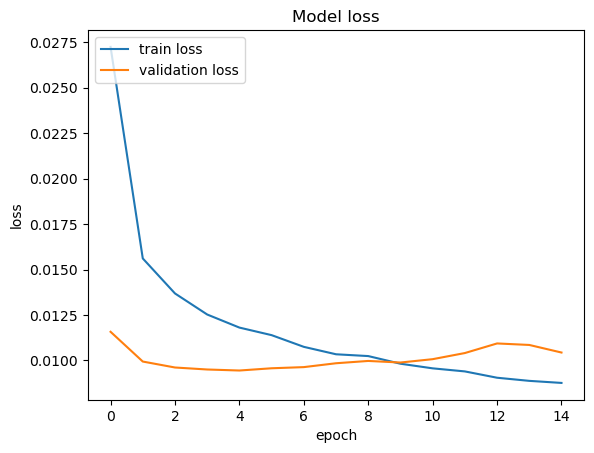

In [72]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [73]:
# Forecast
uni = Fecha_Delito_Hechos['Numero Hechos']
validatehori = uni.tail(48)
validatehist = validatehori.values
scaler_val = preprocessing.MinMaxScaler()
val_rescaled = scaler_x.fit_transform(validatehist.reshape(-1, 1))
val_rescaled = val_rescaled.reshape((1, val_rescaled.shape[0], 1))
Predicted_results = Trained_model.predict(val_rescaled)
Predicted_results

1/1 [==============================] - 0s 112ms/step


array([[0.38646042, 0.36322618, 0.36932653, 0.36196157, 0.356152  ,
        0.43707052, 0.45176542, 0.37735766, 0.42515534, 0.3938732 ,
        0.4042562 , 0.40502638, 0.44147998, 0.44593224, 0.50522065,
        0.42165583, 0.437127  , 0.47090033, 0.3559028 , 0.46994805,
        0.5251149 , 0.42654723, 0.43182617, 0.3985085 , 0.45082885,
        0.48309588, 0.5121801 , 0.48238003, 0.4869525 , 0.48761654]],
      dtype=float32)

In [74]:
Predicted_inver_res = scaler_x.inverse_transform(Predicted_results)

In [75]:
timeseries_evaluation_metrics_func(validate,Predicted_inver_res[0])

Evaluation metric results:-
MSE is : 828.5208106577032
MAE is : 25.501687240600585
RMSE is : 28.784037428020817
MAPE is : 182.3701203483808
R2 is : -1.2446312009654785



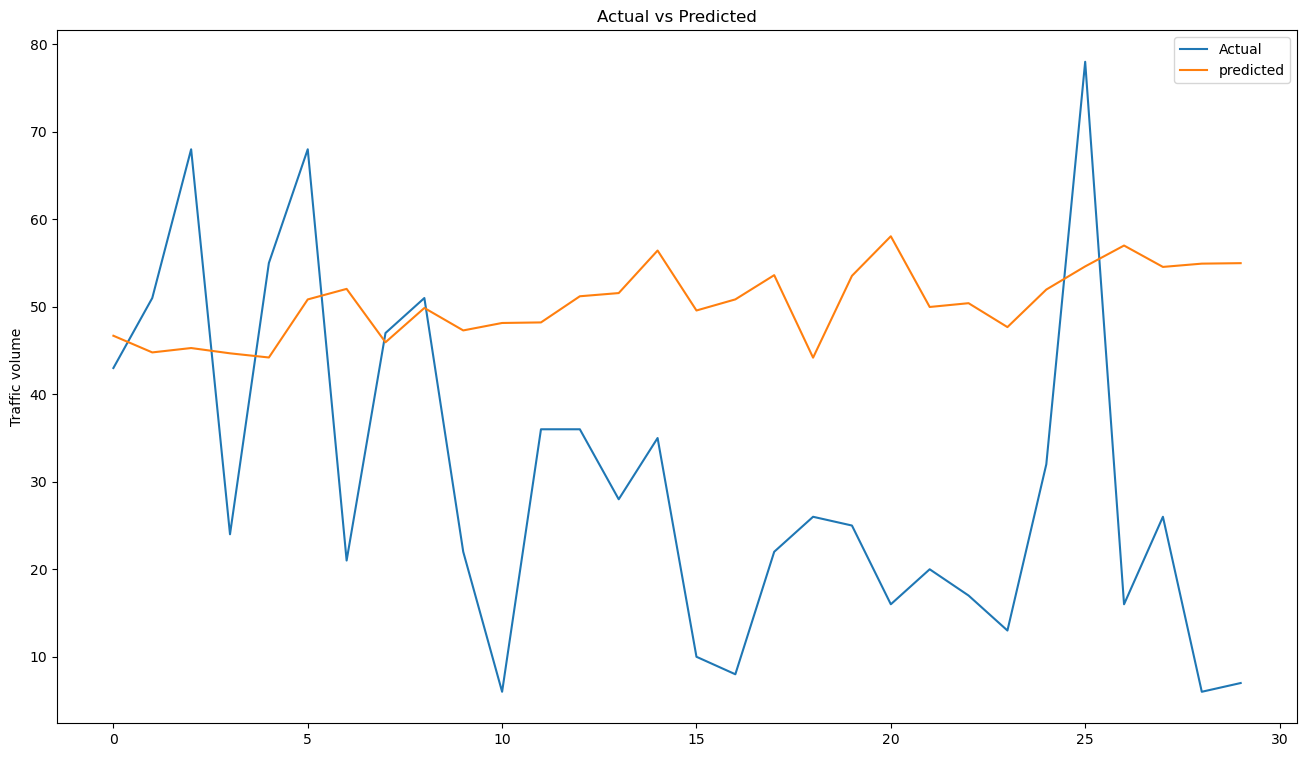

In [76]:
plt.plot( list(validate))
plt.plot( list(Predicted_inver_res[0]))
plt.title("Actual vs Predicted")
plt.ylabel("Traffic volume")
plt.legend(('Actual','predicted'))
plt.show()

In [77]:
Predicted_inver_res[0]

array([46.689754, 44.784546, 45.284775, 44.680847, 44.204464, 50.83978 ,
       52.044765, 45.94333 , 49.86274 , 47.297604, 48.149006, 48.212162,
       51.20136 , 51.56644 , 56.428093, 49.57578 , 50.844414, 53.613823,
       44.18403 , 53.53574 , 58.05942 , 49.97687 , 50.409748, 47.677696,
       51.967964, 54.61386 , 56.998768, 54.555164, 54.930103, 54.98456 ],
      dtype=float32)